In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [2]:
df=pd.read_csv('Zoo.csv')

In [3]:
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [5]:
df['type'].unique()

array([1, 4, 2, 7, 6, 5, 3], dtype=int64)

In [6]:
df_1=df.groupby(df['type'])

In [7]:
df_1.get_group(1)

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1
10,cheetah,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
17,deer,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
19,dolphin,0,0,0,1,0,1,1,1,1,1,0,1,0,1,0,1,1


In [8]:
df_1.get_group(2)

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
11,chicken,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0,2
16,crow,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,0,2
20,dove,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0,2
21,duck,0,1,1,0,1,1,0,0,1,1,0,0,2,1,0,0,2
23,flamingo,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,1,2
33,gull,0,1,1,0,1,1,1,0,1,1,0,0,2,1,0,0,2
37,hawk,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,0,2
41,kiwi,0,1,1,0,0,0,1,0,1,1,0,0,2,1,0,0,2
43,lark,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2
56,ostrich,0,1,1,0,0,0,0,0,1,1,0,0,2,1,0,1,2


In [9]:
df_1.get_group(3)

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
62,pitviper,0,0,1,0,0,0,1,1,1,1,1,0,0,1,0,0,3
76,seasnake,0,0,0,0,0,1,1,1,1,0,1,0,0,1,0,0,3
80,slowworm,0,0,1,0,0,0,1,1,1,1,0,0,0,1,0,0,3
90,tortoise,0,0,1,0,0,0,0,0,1,1,0,0,4,1,0,1,3
91,tuatara,0,0,1,0,0,0,1,1,1,1,0,0,4,1,0,0,3


In [10]:
df_1.get_group(4)

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
12,chub,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
18,dogfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1,4
34,haddock,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,4
38,herring,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
60,pike,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1,4
61,piranha,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
73,seahorse,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,4


In [11]:
df_1.get_group(5)

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5
52,newt,0,0,1,0,0,1,1,1,1,1,0,0,4,1,0,0,5
89,toad,0,0,1,0,0,1,0,1,1,1,0,0,4,0,0,0,5


In [12]:
df_1.get_group(6)

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
24,flea,0,0,1,0,0,0,0,0,0,1,0,0,6,0,0,0,6
30,gnat,0,0,1,0,1,0,0,0,0,1,0,0,6,0,0,0,6
39,honeybee,1,0,1,0,1,0,0,0,0,1,1,0,6,0,1,0,6
40,housefly,1,0,1,0,1,0,0,0,0,1,0,0,6,0,0,0,6
42,ladybird,0,0,1,0,1,0,1,0,0,1,0,0,6,0,0,0,6
51,moth,1,0,1,0,1,0,0,0,0,1,0,0,6,0,0,0,6
88,termite,0,0,1,0,0,0,0,0,0,1,0,0,6,0,0,0,6
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6


In [13]:
df_1.get_group(7)

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
13,clam,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,7
14,crab,0,0,1,0,0,1,1,0,0,0,0,0,4,0,0,0,7
15,crayfish,0,0,1,0,0,1,1,0,0,0,0,0,6,0,0,0,7
46,lobster,0,0,1,0,0,1,1,0,0,0,0,0,6,0,0,0,7
53,octopus,0,0,1,0,0,1,1,0,0,0,0,0,8,0,0,1,7
72,scorpion,0,0,0,0,0,0,1,0,0,1,1,0,8,1,0,0,7
77,seawasp,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,7
81,slug,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7
85,starfish,0,0,1,0,0,1,1,0,0,0,0,0,5,0,0,0,7
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sagar\anaconda3\lib\si

<AxesSubplot:xlabel='milk', ylabel='count'>

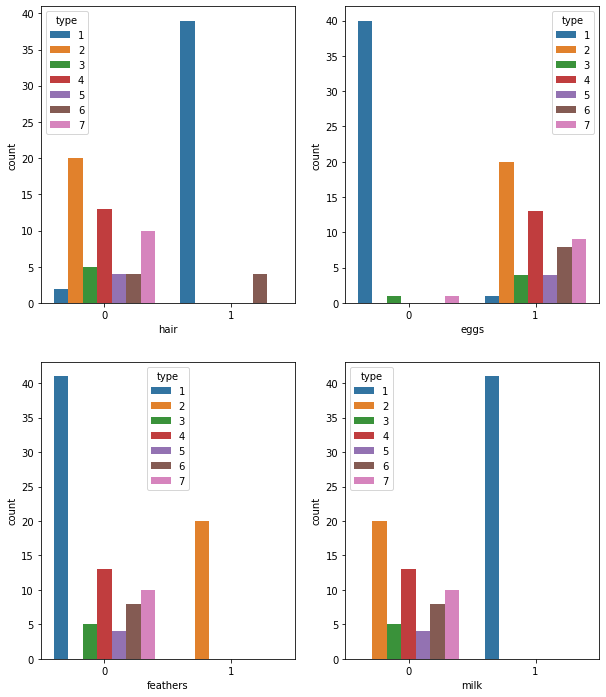

In [14]:
fig,axx=plt.subplots(2,2,figsize=(10,12))
sns.countplot(df['hair'],hue=df['type'],ax=axx[0][0])
sns.countplot(df['feathers'],hue=df['type'],ax=axx[1][0])
sns.countplot(df['eggs'],hue=df['type'],ax=axx[0][1])
sns.countplot(df['milk'],hue=df['type'],ax=axx[1][1])

C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sagar\anaconda3\lib\si

<AxesSubplot:xlabel='predator', ylabel='count'>

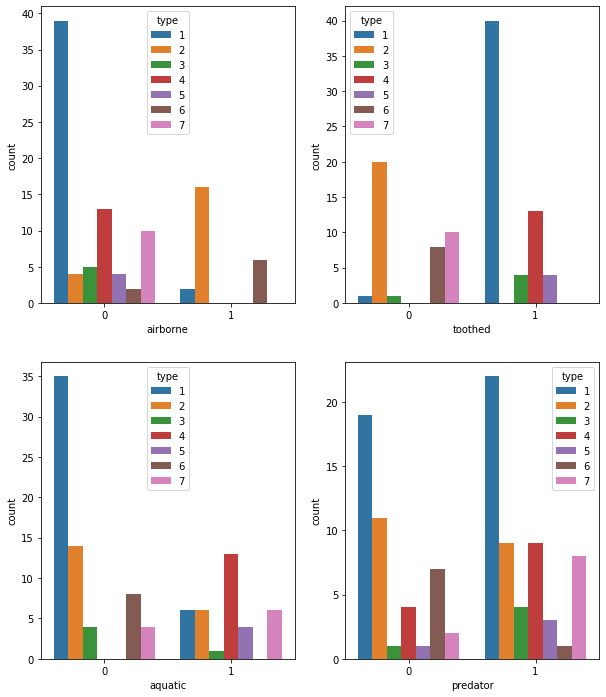

In [15]:
fig,axx=plt.subplots(2,2,figsize=(10,12))
sns.countplot(df['airborne'],hue=df['type'],ax=axx[0][0])
sns.countplot(df['aquatic'],hue=df['type'],ax=axx[1][0])
sns.countplot(df['toothed'],hue=df['type'],ax=axx[0][1])
sns.countplot(df['predator'],hue=df['type'],ax=axx[1][1])

In [16]:
df.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sagar\anaconda3\lib\si

<AxesSubplot:xlabel='fins', ylabel='count'>

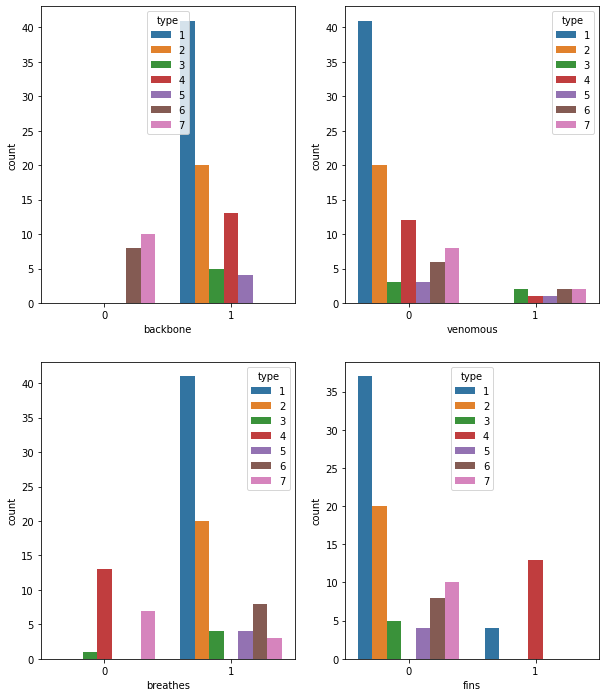

In [17]:
fig,axx=plt.subplots(2,2,figsize=(10,12))
sns.countplot(df['backbone'],hue=df['type'],ax=axx[0][0])
sns.countplot(df['breathes'],hue=df['type'],ax=axx[1][0])
sns.countplot(df['venomous'],hue=df['type'],ax=axx[0][1])
sns.countplot(df['fins'],hue=df['type'],ax=axx[1][1])

C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sagar\anaconda3\lib\si

<AxesSubplot:xlabel='catsize', ylabel='count'>

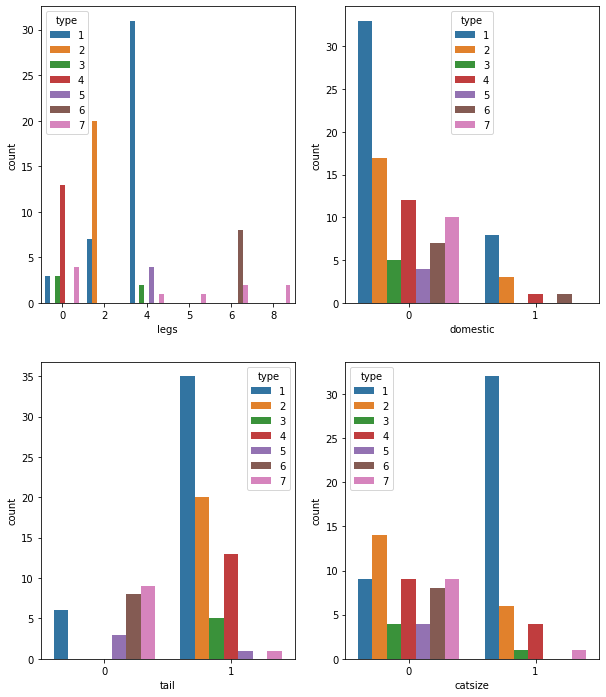

In [18]:
fig,axx=plt.subplots(2,2,figsize=(10,12))
sns.countplot(df['legs'],hue=df['type'],ax=axx[0][0])
sns.countplot(df['tail'],hue=df['type'],ax=axx[1][0])
sns.countplot(df['domestic'],hue=df['type'],ax=axx[0][1])
sns.countplot(df['catsize'],hue=df['type'],ax=axx[1][1])

C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


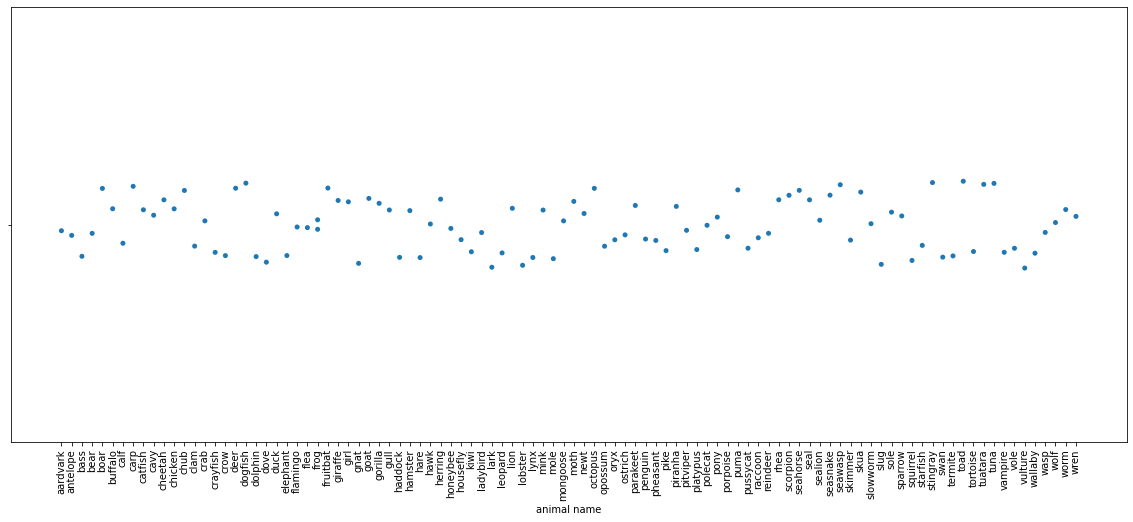

In [19]:
plt.figure(figsize=(20,8))
sns.stripplot(df['animal name'],hue=df['type'])
plt.xticks(rotation=90)
plt.show()

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x=df.iloc[:,1:17]
y=df.iloc[:,17]

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [23]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(70, 16) (31, 16) (70,) (31,)


In [24]:
k_values=np.arange(1,20)
training_accuracy=[]
testing_accuracy=[]

In [25]:
for i ,k in enumerate(k_values):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    training_accuracy.append(knn.score(x_train,y_train))
    testing_accuracy.append(knn.score(x_test,y_test))

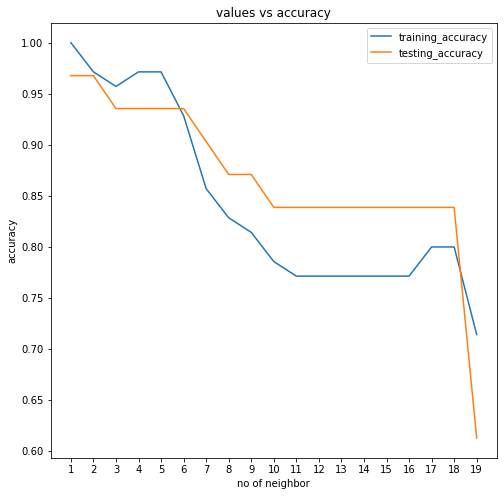

In [26]:
plt.figure(figsize=(8,8))
plt.plot(k_values,training_accuracy,label='training_accuracy')
plt.plot(k_values,testing_accuracy,label='testing_accuracy')
plt.legend()
plt.title('values vs accuracy')
plt.xlabel('no of neighbor')
plt.ylabel('accuracy')
plt.xticks(k_values)
plt.show()

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
param_grid=dict(n_neighbors=k_values)
model=KNeighborsClassifier()
grid=GridSearchCV(estimator=model,param_grid=param_grid)
grid.fit(x_train,y_train)

C:\Users\sagar\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [29]:
print(grid.best_score_)
print(grid.best_params_)

0.9428571428571428
{'n_neighbors': 1}


In [30]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
knn=KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train,y_train)
y_train_pred=knn.predict(x_train)
print(accuracy_score(y_train,y_train_pred))

0.9285714285714286


In [31]:
y_pred=knn.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.9354838709677419
